In [5]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import math


def eigenvalue_clipping(lambdas,v,lambda_plus):
    N=len(lambdas)
    
    
    # _s stands for _structure below
    sum_lambdas_gt_lambda_plus=np.sum(lambdas[lambdas>lambda_plus])
    
    sel_bulk=lambdas<=lambda_plus                     # these eigenvalues come from the seemingly random bulk
    N_bulk=np.sum(sel_bulk)
    sum_lambda_bulk=np.sum(lambdas[sel_bulk])        
    delta=sum_lambda_bulk/N_bulk                      # delta is their average, so as to conserver the trace of C
    
    lambdas_clean=lambdas
    lambdas_clean[lambdas_clean<=lambda_plus]=delta
    
    
    C_clean=np.zeros((N, N))
    v_m=np.matrix(v)
    
    for i in range(N-1):
        C_clean=C_clean+lambdas_clean[i] * np.dot(v_m[i,].T,v_m[i,]) 
        
    np.fill_diagonal(C_clean,1)
            
    return C_clean    
    


In [6]:

N=1000
T=2000
R=np.random.normal(0,1,N*T).reshape((N,T))
R.shape

(1000, 2000)

In [7]:
C=np.corrcoef(R)
C.shape               # N times N, so far so good.

(1000, 1000)

In [8]:
lambdas_e, V_e = LA.eig(C)   # _e stands for empirical


# Marcenko-Pastur distribution


In [9]:
def P0(lambdas,q):
    lambda_plus = (1+np.sqrt(q))**2
    lambda_minus = (1-np.sqrt(q))**2
    vals = 1/(q*2*np.pi*lambdas)*np.sqrt((lambda_plus-lambdas)*(lambdas-lambda_minus))
    return vals

In [10]:
q=N/T
lambdas=np.linspace((1.-np.sqrt(q))**2,(1.+np.sqrt(q))**2,200)
P0s=P0(lambdas,q)

/tmp/ipykernel_1988871/762245224.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lambdas_e,kde=False,norm_hist=True,bins=50)  # no Kernel Density Estimation


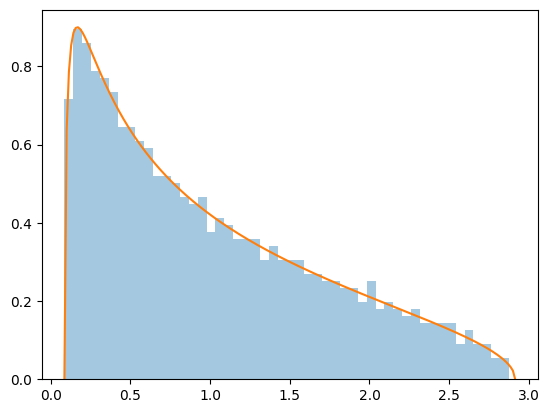

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(lambdas_e,kde=False,norm_hist=True,bins=50)  # no Kernel Density Estimation
plt.plot(lambdas,P0s)

In [12]:
q=N/T
lambda_plus=(1+np.sqrt(q))**2
C_clipped=eigenvalue_clipping(lambdas_e,V_e,lambda_plus)
C_clipped # it works


matrix([[ 1.00000000e+00,  1.42265119e-04,  4.15245672e-04, ...,
         -2.67035440e-04,  7.11463241e-05,  3.80026438e-04],
        [ 1.42265119e-04,  1.00000000e+00, -3.93408653e-04, ...,
          2.52992529e-04, -6.74048675e-05, -3.60041535e-04],
        [ 4.15245672e-04, -3.93408653e-04,  1.00000000e+00, ...,
          7.38438583e-04, -1.96742390e-04, -1.05089491e-03],
        ...,
        [-2.67035440e-04,  2.52992529e-04,  7.38438583e-04, ...,
          1.00000000e+00,  1.26520742e-04,  6.75807607e-04],
        [ 7.11463241e-05, -6.74048675e-05, -1.96742390e-04, ...,
          1.26520742e-04,  1.00000000e+00, -1.80055603e-04],
        [ 3.80026438e-04, -3.60041535e-04, -1.05089491e-03, ...,
          6.75807607e-04, -1.80055603e-04,  1.00000000e+00]])

## Equity data


In [13]:
alldata=pd.read_csv("data/clean/us_equities_logreturns.csv.gz")

In [14]:
alldata.drop(columns="Unnamed: 0",inplace=True)

In [30]:
N=200
T=500   # N\simeq 1000

t0=14000
t1=t0+T

X_raw= alldata.iloc[t0:t1].dropna(axis=1)      # drops any asset with an NA
X_raw=X_raw[X_raw.columns[:N]]
X_raw.shape

(500, 200)

In [31]:
C_us = X_raw.corr()  

In [32]:
C_us    # check if the correlation was asset-wise, or time-wise

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,HSY,DOV,MDP,GCO,FUR,ETN,MWV,GAM,CPB,SHW
^GSPC,1.000000,0.660959,0.518914,0.552186,0.516086,0.514025,0.527749,0.505711,0.602788,0.603340,...,0.406618,0.653079,0.332210,0.401771,0.226436,0.616879,0.608123,0.780240,0.476640,0.423739
GE,0.660959,1.000000,0.428718,0.366775,0.378862,0.300928,0.291445,0.332312,0.413996,0.438189,...,0.337952,0.385320,0.183570,0.199187,0.134769,0.370534,0.371660,0.453807,0.280479,0.251214
IBM,0.518914,0.428718,1.000000,0.367010,0.246439,0.197911,0.143801,0.385904,0.314501,0.409149,...,0.206257,0.312566,0.192323,0.170575,0.073334,0.320637,0.293890,0.399092,0.275495,0.257829
DIS,0.552186,0.366775,0.367010,1.000000,0.339615,0.251701,0.227350,0.305922,0.347959,0.352636,...,0.231004,0.332758,0.223091,0.219677,0.179355,0.386252,0.300301,0.462141,0.292560,0.179092
BA,0.516086,0.378862,0.246439,0.339615,1.000000,0.347604,0.304947,0.252741,0.299739,0.297844,...,0.233708,0.403607,0.220467,0.301204,0.103425,0.408226,0.331952,0.418044,0.282393,0.258207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ETN,0.616879,0.370534,0.320637,0.386252,0.408226,0.459000,0.417052,0.314123,0.374222,0.310782,...,0.223599,0.572318,0.313847,0.274911,0.067765,1.000000,0.387881,0.526089,0.308705,0.305692
MWV,0.608123,0.371660,0.293890,0.300301,0.331952,0.377484,0.453603,0.307861,0.421225,0.349115,...,0.207990,0.419317,0.166521,0.326418,0.168526,0.387881,1.000000,0.527137,0.290760,0.285825
GAM,0.780240,0.453807,0.399092,0.462141,0.418044,0.442482,0.525735,0.391346,0.467206,0.460816,...,0.323761,0.555253,0.243235,0.323516,0.108955,0.526089,0.527137,1.000000,0.333364,0.351517
CPB,0.476640,0.280479,0.275495,0.292560,0.282393,0.190164,0.190558,0.255492,0.288741,0.324421,...,0.277713,0.286488,0.261312,0.134469,0.160217,0.308705,0.290760,0.333364,1.000000,0.175493


In [33]:
l_e, V_e = LA.eig(C_us)

In [34]:
N = C_us.shape[0]
q = N/T
lambda_plus = (1+np.sqrt(q))**2

In [35]:
### Number of eigenvalues outside of the random bulk

In [36]:
np.sum(l_e>lambda_plus)   # about 2% of the eigenvalues

6

In [39]:
np.sum(l_e>lambda_plus)/N   # about 2-3% of the eigenvalues

0.03

In [40]:
C_us_clipped=eigenvalue_clipping(l_e,V_e,lambda_plus)

In [41]:
C_us_clipped

matrix([[ 1.        ,  0.21307405,  0.0073222 , ...,  0.20501419,
         -0.0406021 ,  0.0727148 ],
        [ 0.21307405,  1.        , -0.00705541, ...,  0.1094489 ,
         -0.03722999,  0.0243779 ],
        [ 0.0073222 , -0.00705541,  1.        , ...,  0.00372165,
         -0.07871049,  0.03659525],
        ...,
        [ 0.20501419,  0.1094489 ,  0.00372165, ...,  1.        ,
         -0.04300375,  0.02192722],
        [-0.0406021 , -0.03722999, -0.07871049, ..., -0.04300375,
          1.        , -0.12642578],
        [ 0.0727148 ,  0.0243779 ,  0.03659525, ...,  0.02192722,
         -0.12642578,  1.        ]])

# 

In [42]:
import pyRMT
import sklearn

In [50]:
X_centered = sklearn.preprocessing.StandardScaler(with_mean=True,
                           with_std=False).fit_transform(X_raw.values)  # column-wise!
Sigma_NLS=pyRMT.optimalShrinkage(X_centered)
Sigma_NLS.shape   # check if NxN

(200, 200)

In [44]:
import bahc

In [51]:
Sigma_BAHC=bahc.filterCovariance(X_centered.T)
Sigma_BAHC.shape  # chcek if NxN

(200, 200)

## Portfolio optimisation

Let us focus on Global Minimum Variance optimization where one only aims at minimizing the volatility of the portfolio. Denoting the investment weight into asset $i$ by $w_i$ and the covariance matrix by $\Sigma$, the problem can be written as
$$
w^*=\arg \max w^t \Sigma w\ \ \ \ \textrm{with }\sum_i w_i=1,
$$
where $w^t$ is the transpose of $w$.

Simple linear algebra (using Lagrange multipliers) yields 
$$
w^*=\frac{\Sigma^{-1}e}{e^t\Sigma^{-1}e},
$$
where $e$ is a vector full of 1: $w^*$ is the vector defined as the sum of the lines of $\Sigma^{-1}$ normalized by the sum of all the elements of $\Sigma^{-1}$.


In [47]:
def weights_GVM(Sigma):
    Sigma_inv=LA.inv(Sigma)
    w_GVM=Sigma_inv.sum(axis=1)/Sigma_inv.sum()
    return w_GVM

In [49]:
w_GBM_NLS=weights_GVM(Sigma_NLS)
w_GBM_BAHC=weights_GVM(Sigma_BAHC)

### Out-of-sample portfolio volatility

Let us first define an out-of-sample interval. By definition, it will be $[t_1,t_1+T_{out}$. For example $T_{out}=T$, or 2 weeks, or whatever.  Then the realized volatility is 
$$
\sigma_P^2 = w^t \Sigma w
$$
where $\Sigma$ is the realized, {\em unfiltered}, covariance matrix.

In [52]:
T_out=252  # a year

t1_out=t1+T_out
X_raw_out=alldata.iloc[t1:t1_out]
X_raw_out=X_raw_out[X_raw.columns]

Sigma_realized=X_raw_out.cov()

In [55]:
sigma2_P_NLS= w_GBM_NLS@(Sigma_realized@w_GBM_NLS)
sigma2_P_NLS

0.00016661827074462818

In [54]:
sigma2_P_BAHC= w_GBM_BAHC@(Sigma_realized@w_GBM_BAHC)
sigma2_P_BAHC

5.389236797973691e-05

In [56]:
sigma2_P_NLS/sigma2_P_BAHC

3.0916858358733705

## Rolling computations

Let us try the rolling functionality of pandas

In [60]:
X_base=alldata.iloc[t0:t0+2*T][X_raw.columns]    #  I only take a subset of the good part of the matrix because of RAM potentially filling up. 
X_base.shape

(1000, 200)

In [62]:
%%time         
C_roll=X_base.rolling(T).corr()               # this only uses one core on my laptop

CPU times: user 19.1 s, sys: 2.28 s, total: 21.4 s
Wall time: 21.4 s


In [65]:
type(C_roll)

pandas.core.frame.DataFrame

In [66]:
C_roll

^GSPC        GE       IBM       DIS        BA       CAT  \
14000 ^GSPC       NaN       NaN       NaN       NaN       NaN       NaN   
      GE          NaN       NaN       NaN       NaN       NaN       NaN   
      IBM         NaN       NaN       NaN       NaN       NaN       NaN   
      DIS         NaN       NaN       NaN       NaN       NaN       NaN   
      BA          NaN       NaN       NaN       NaN       NaN       NaN   
...               ...       ...       ...       ...       ...       ...   
14999 ETN    0.781620  0.634169  0.595753  0.679476  0.625783  0.765388   
      MWV    0.778808  0.639283  0.608740  0.645494  0.548415  0.685844   
      GAM    0.888093  0.668819  0.711070  0.755411  0.689828  0.729324   
      CPB    0.537198  0.359563  0.397518  0.484201  0.418454  0.358252   
      SHW    0.657022  0.486032  0.544920  0.564651  0.475811  0.503072   

                   AA       HPQ        DD        KO  ...       HSY       DOV  \
14000 ^GSPC       NaN       NaN       NaN       NaN  ...       NaN       NaN   
      GE          NaN       NaN       NaN       NaN  ...       NaN       NaN   
      IBM         NaN       NaN       NaN       NaN  ...       NaN       NaN   
      DIS         NaN       NaN       NaN       NaN  ...       NaN       NaN   
      BA          NaN       NaN       NaN       NaN  ...       NaN       NaN   
...               ...       ...       ...       ...  ...       ...       ...   
14999 ETN    0.664083  0.582622  0.737802  0.409842  ...  0.445717  0.755565   
      MWV    0.641706  0.594400  0.737765  0.418109  ...  0.428444  0.702140   
      GAM    0.733773  0.653993  0.795387  0.550812  ...  0.497767  0.754659   
      CPB    0.382651  0.384708  0.459619  0.456280  ...  0.493161  0.419735   
      SHW    0.439939  0.464764  0.597551  0.378641  ...  0.423268  0.574687   

                  MDP       GCO       FUR       ETN       MWV       GAM  \
14000 ^GSPC       NaN       NaN       NaN       NaN       NaN       NaN   
      GE          NaN       NaN       NaN       NaN       NaN       NaN   
      IBM         NaN       NaN       NaN       NaN       NaN       NaN   
      DIS         NaN       NaN       NaN       NaN       NaN       NaN   
      BA          NaN       NaN       NaN       NaN       NaN       NaN   
...               ...       ...       ...       ...       ...       ...   
14999 ETN    0.581839  0.385090  0.562526  1.000000  0.633703  0.691290   
      MWV    0.602896  0.429562  0.541076  0.633703  1.000000  0.745703   
      GAM    0.672981  0.466955  0.563831  0.691290  0.745703  1.000000   
      CPB    0.336584  0.258897  0.305153  0.392258  0.366927  0.437664   
      SHW    0.474273  0.383497  0.440471  0.578832  0.490870  0.523579   

                  CPB       SHW  
14000 ^GSPC       NaN       NaN  
      GE          NaN       NaN  
      IBM         NaN       NaN  
      DIS         NaN       NaN  
      BA          NaN       NaN  
...               ...       ...  
14999 ETN    0.392258  0.578832  
      MWV    0.366927  0.490870  
      GAM    0.437664  0.523579  
      CPB    1.000000  0.392367  
      SHW    0.392367  1.000000  

[200000 rows x 200 columns]

In [67]:
%%time 
X_base.iloc[:T].corr()

CPU times: user 52.8 ms, sys: 0 ns, total: 52.8 ms
Wall time: 51.6 ms


,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,HSY,DOV,MDP,GCO,FUR,ETN,MWV,GAM,CPB,SHW
^GSPC,1.000000,0.660959,0.518914,0.552186,0.516086,0.514025,0.527749,0.505711,0.602788,0.603340,...,0.406618,0.653079,0.332210,0.401771,0.226436,0.616879,0.608123,0.780240,0.476640,0.423739
GE,0.660959,1.000000,0.428718,0.366775,0.378862,0.300928,0.291445,0.332312,0.413996,0.438189,...,0.337952,0.385320,0.183570,0.199187,0.134769,0.370534,0.371660,0.453807,0.280479,0.251214
IBM,0.518914,0.428718,1.000000,0.367010,0.246439,0.197911,0.143801,0.385904,0.314501,0.409149,...,0.206257,0.312566,0.192323,0.170575,0.073334,0.320637,0.293890,0.399092,0.275495,0.257829
DIS,0.552186,0.366775,0.367010,1.000000,0.339615,0.251701,0.227350,0.305922,0.347959,0.352636,...,0.231004,0.332758,0.223091,0.219677,0.179355,0.386252,0.300301,0.462141,0.292560,0.179092
BA,0.516086,0.378862,0.246439,0.339615,1.000000,0.347604,0.304947,0.252741,0.299739,0.297844,...,0.233708,0.403607,0.220467,0.301204,0.103425,0.408226,0.331952,0.418044,0.282393,0.258207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ETN,0.616879,0.370534,0.320637,0.386252,0.408226,0.459000,0.417052,0.314123,0.374222,0.310782,...,0.223599,0.572318,0.313847,0.274911,0.067765,1.000000,0.387881,0.526089,0.308705,0.305692
MWV,0.608123,0.371660,0.293890,0.300301,0.331952,0.377484,0.453603,0.307861,0.421225,0.349115,...,0.207990,0.419317,0.166521,0.326418,0.168526,0.387881,1.000000,0.527137,0.290760,0.285825
GAM,0.780240,0.453807,0.399092,0.462141,0.418044,0.442482,0.525735,0.391346,0.467206,0.460816,...,0.323761,0.555253,0.243235,0.323516,0.108955,0.526089,0.527137,1.000000,0.333364,0.351517
CPB,0.476640,0.280479,0.275495,0.292560,0.282393,0.190164,0.190558,0.255492,0.288741,0.324421,...,0.277713,0.286488,0.261312,0.134469,0.160217,0.308705,0.290760,0.333364,1.000000,0.175493


Therefore .rolling(T).corr() is not well programmed.

This takes a second with roll library in R. 

```R
library(roll)
library(data.table)

TT=200
X_base=fread("X_base.csv.gz")
X_base[,V1:=NULL]  # removes the first column
X_base=as.matrix(X_base)

system.time(roll_cor(X_base,X_base,TT))
# user  system elapsed 
# 4.843   0.250   1.049 
```

In short, look for the best solution in Python if needed.